In [24]:
Pkg.add("ReverseDiffSource")
Pkg.build("ReverseDiffSource")
Pkg.build("PyPlot")
using PyPlot
using ReverseDiffSource

INFO: Nothing to be done


In [25]:
data = readdlm("binary.csv",',','\r');

In [26]:
y = data[:,1];
u = data[:,2:4];
o = ones(size(u,1));
u = [u o];
m = size(y,1);
n = 4;
eta = 10^-8.0;

In [27]:
function newtmin(obj,x0; maxIts=1000, optTol=1e-6)
    fvals = [];
    gNormVals=[];
    (f0,g0,H0) = obj(x0);
    x = x0;
    (f,g,H) = obj(x);
    its = 0;
    while (norm(g,2) > optTol* norm(g0,2) && norm(g,2) > 1e-8 && its < maxIts)
        (f,g,H) = obj(x);
        
        #modify H if not pos def
        E = eigfact(H);
        V = E[:vectors];
        lambda = diagm(max(E[:values],1e-2));
        d = -V*inv(lambda)*transpose(V)*g;
        
        #backtracking linesearch
        alpha = 1;
        mu = 10^-2.0;
        (newf,newg,newH) = obj(x+alpha*d);
        while newf > f + (alpha*mu)*(dot(g,d))
            (newf, newg, newH) = obj(x + alpha*d);
            alpha = alpha/2;
        end

        x = x+alpha*d;

        its = its + 1;
        fvals = [fvals; f];
        gNormVals= [gNormVals; norm(g,2)];
    end 
    
    if its < maxIts
        println("Method computed optimal \nx: ", x)
        println("Iterations: ", its)
        println("Objective: ", f)
        println("Gradient norm: ", norm(g,2))
    else
        println("Method went over maxIts: ", maxIts)
        println("x: ", x)
        println("Objective: ", f)
        println("Gradient norm: ", norm(g,2))
    end
    return (x,its,fvals,gNormVals);
end



newtmin (generic function with 1 method)

In [28]:
# L(a,\beta) defined to allow rdiff(L, (ones(n),), order=2 )
# Question: Can we use a smarter product and index over j's too?!?

function L(a)
    valL = 0
    for i=1:m
        valL = valL -(y[i]*a[1]*u[i,1] + y[i]*a[2]*u[i,2] + y[i]*a[3]*u[i,3] + y[i]*a[4]*u[i,4]) + log(1 + exp(a[1]*u[i,1]+a[2]*u[i,2]+a[3]*u[i,3]+a[4]*u[i,4]))
    end
    return valL
end

L (generic function with 1 method)

In [29]:
diffL = rdiff( L, (ones(n),), order = 2)

(anonymous function)

In [30]:
(x,its,fvals,gNormVals) = newtmin(diffL,.5*ones(4))

Method computed optimal 
x: [0.0022939595044433147,0.7770135737198496,-0.5600313868499864,-3.4495483976684493]
Iterations: 52
Objective: 229.7208825156387
Gradient norm: 0.0017870901464972933


([0.00229396,0.777014,-0.560031,-3.44955],52,[79193.4,37677.8,30907.3,30029.3,29679.0,29446.6,29213.6,28981.9,28755.0,28528.4  …  7202.33,3243.43,1453.67,686.352,302.683,248.519,233.468,229.755,229.721,229.721],[156485.0,121664.0,79113.1,72643.2,55847.3,55870.5,56187.0,56654.9,56790.6,56573.3  …  25807.4,22132.2,17322.6,14032.3,8332.53,3809.07,7237.34,622.658,8.49436,0.00178709])

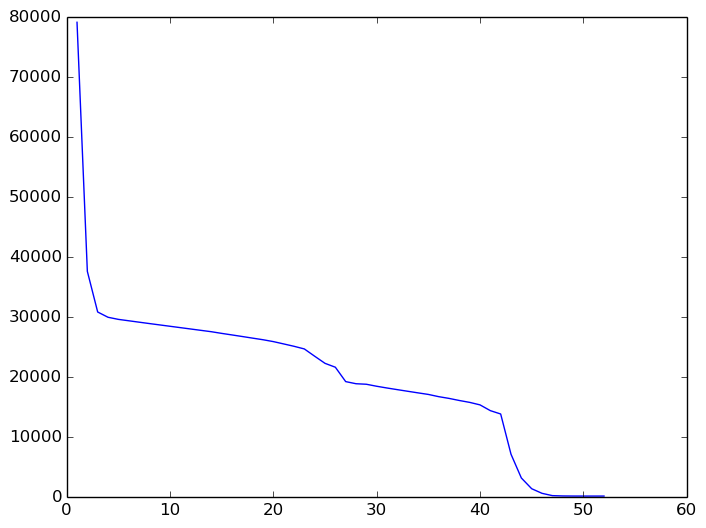

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f10281ccf10>

In [31]:
plot(1:size(fvals,1),fvals)

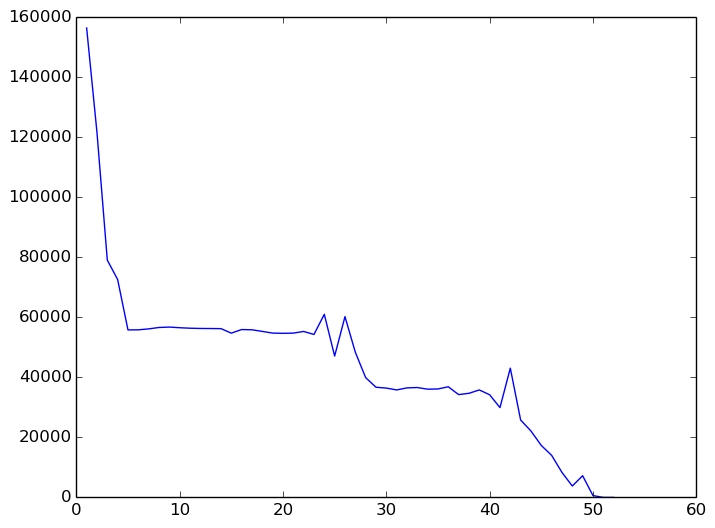

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f10281100d0>

In [32]:
plot(1:size(gNormVals,1),gNormVals)